# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [2]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
pd.pandas.set_option('display.max_columns',None)

### Understanding the data

In [3]:
# Importing dataset
churn_df=pd.read_csv('Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#shape of imported dataset
churn_df.shape

(7043, 21)

In [5]:
#column in dataset
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#information about col in dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# sum of null value in dataset
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#numerical_features = ['tenure', 'MonthlyCharges']

In [10]:
#categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

### Data Manipulation

In [11]:
#preparing data for machine learning algo and EDA
df=churn_df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### coverting all categorical variable into Numerical variable

In [12]:
# Convert String values (Yes and No) of Churn column to 1 and 0
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [13]:
# Replace space null value in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [14]:
df =df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace("nan",0)

In [16]:
df["TotalCharges"] = df.TotalCharges.astype(float)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
# converting catagorical value male as 1 and female as 0
df['gender'].replace(to_replace='Male', value=1, inplace=True)
df['gender'].replace(to_replace='Female',  value=0, inplace=True)

In [19]:
# repalce data
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [20]:
#checking Unique value in each col on the datasets
categorical_columns=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].unique())


Frequency of Categories for varible Partner
['Yes' 'No']

Frequency of Categories for varible Dependents
['No' 'Yes']

Frequency of Categories for varible PhoneService
['No' 'Yes']

Frequency of Categories for varible MultipleLines
['No' 'Yes']

Frequency of Categories for varible InternetService
['DSL' 'Fiber optic' 'No']

Frequency of Categories for varible OnlineSecurity
['No' 'Yes']

Frequency of Categories for varible OnlineBackup
['Yes' 'No']

Frequency of Categories for varible DeviceProtection
['No' 'Yes']

Frequency of Categories for varible TechSupport
['No' 'Yes']

Frequency of Categories for varible StreamingTV
['No' 'Yes']

Frequency of Categories for varible StreamingMovies
['No' 'Yes']

Frequency of Categories for varible Contract
['Month-to-month' 'One year' 'Two year']

Frequency of Categories for varible PaperlessBilling
['Yes' 'No']

Frequency of Categories for varible PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automa

In [21]:
# converting only two state col to 0 and 1
two_state_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in two_state_col:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
    

In [22]:
df_to_1_Hot=df
df_to_1_Hot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# one hot encoding on col who have more than 3 unique value
df2 = pd.get_dummies(data=df_to_1_Hot, columns=['InternetService','Contract','PaymentMethod'])
df2.shape

(7032, 27)

In [24]:
df2.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,1,0,0,0,38,1,0,0,0,0,0,0,0,1,69.50,2625.25,0,0,1,0,1,0,0,0,1,0,0
7023,0,0,0,0,67,1,1,1,1,1,0,1,0,1,102.95,6886.25,1,0,1,0,1,0,0,0,1,0,0
7024,1,0,0,0,19,1,0,0,0,0,0,1,0,1,78.70,1495.10,0,0,1,0,1,0,0,1,0,0,0
7025,0,0,0,0,12,0,0,0,1,1,1,1,1,0,60.65,743.30,0,1,0,0,0,1,0,0,0,1,0
7026,0,0,0,0,72,1,0,0,0,0,0,0,0,1,21.15,1419.40,0,0,0,1,0,0,1,1,0,0,0
7027,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7028,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7029,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1
7031,1,0,0,0,66,1,0,1,0,1,1,1,1,1,105.65,6844.50,0,0,1,0,0,0,1,1,0,0,0


### Data Visualization

<AxesSubplot:>

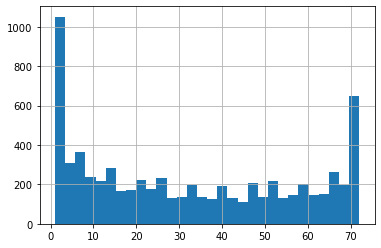

In [25]:
# plotting  ternure 
df['tenure'].hist(bins=30)

<AxesSubplot:>

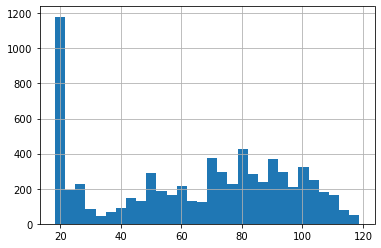

In [26]:
# plotting MonthlyCharges
df['MonthlyCharges'].hist(bins=30)

<AxesSubplot:>

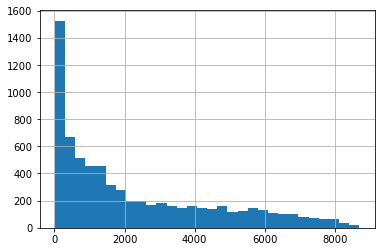

In [27]:
# plotting TotalCharges
df['TotalCharges'].hist(bins=30)

<AxesSubplot:ylabel='Count'>

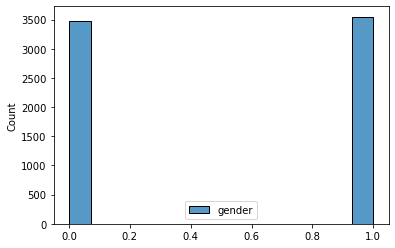

In [28]:
# checking ratio of gender
sns.histplot([df2.gender])

we have equal amount of data in terms of gender col

<AxesSubplot:>

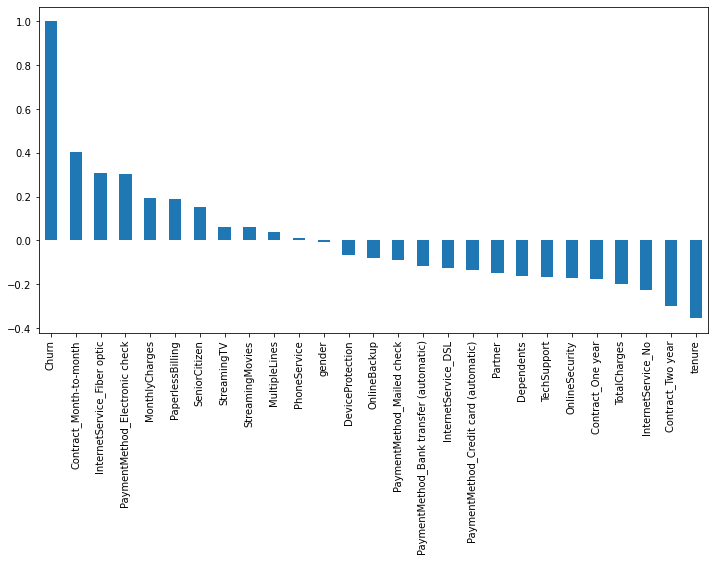

In [29]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,6))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

factors like Gender, Availability of PhoneService and multiple lines have alomost NO impact on Churn

Text(0.5, 1.0, '% of Senior Citizens')

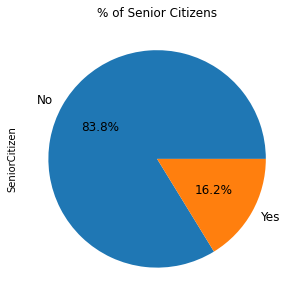

In [30]:
#pie plot 
ax = (df2['SeniorCitizen'].value_counts()*100.0 /len(df2))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('% of Senior Citizens', fontsize = 12)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

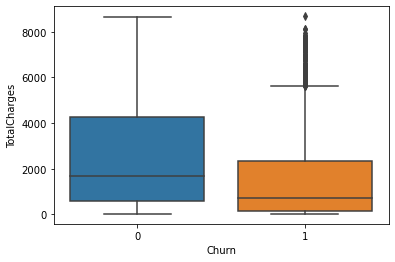

In [31]:
sns.boxplot(x='Churn',y='TotalCharges',data=df2)

we observed than if curn in true then it may be because of outliar of total charges

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

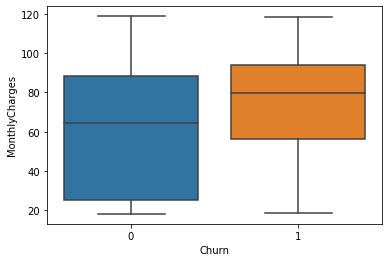

In [32]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df2)

no Outliar in monthly charges

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

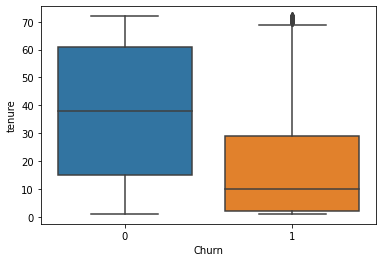

In [33]:
sns.boxplot(x='Churn',y='tenure',data=df2)

<AxesSubplot:>

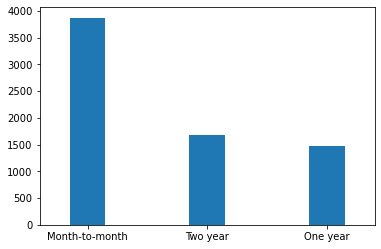

In [34]:
df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)

number of subscriber with 3 diff plan

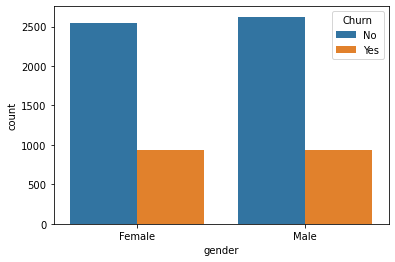

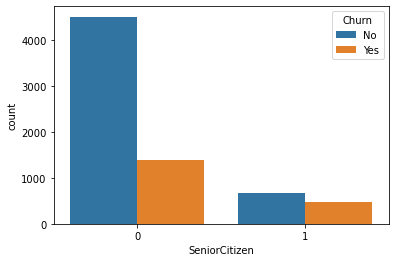

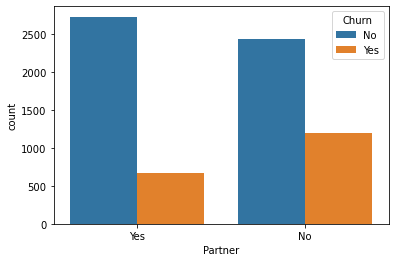

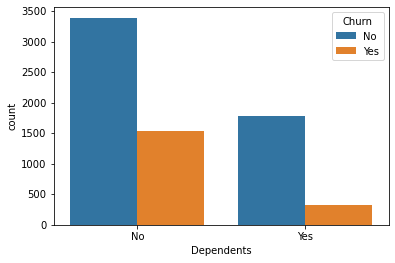

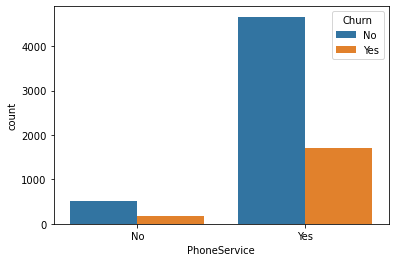

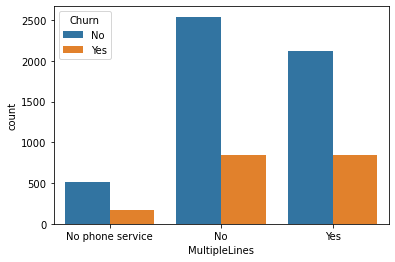

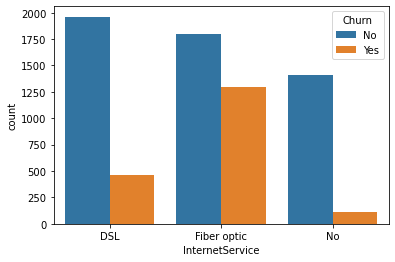

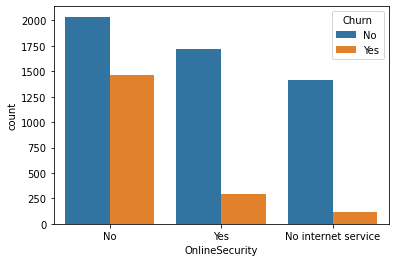

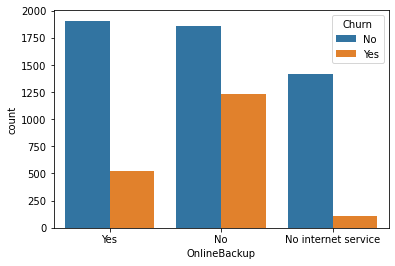

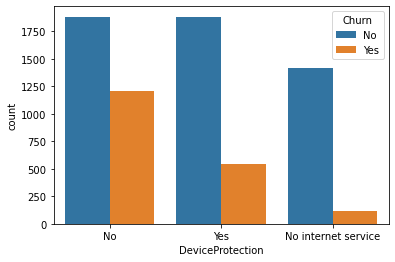

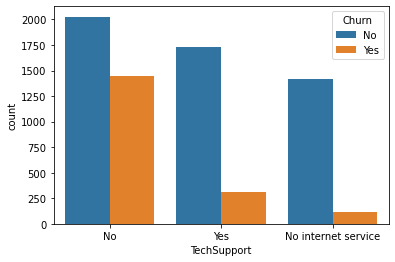

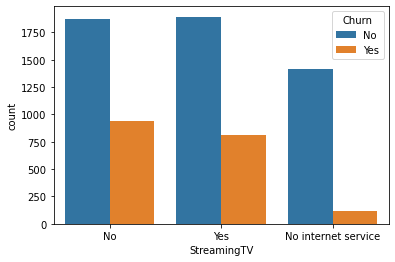

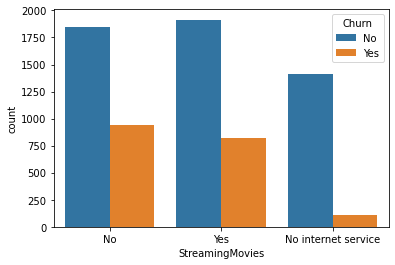

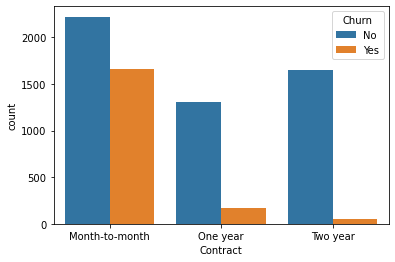

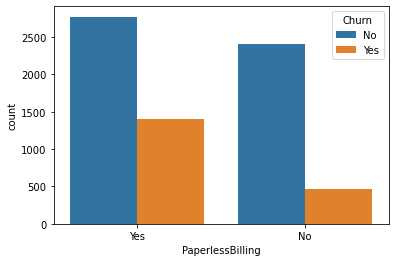

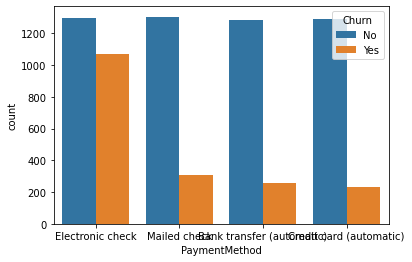

In [35]:
for i, predictor in enumerate(churn_df.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=churn_df, x=predictor, hue='Churn')

summary of above graph
1.churn rate in both gender is same.
2.churn rate in young customur is high
3.churn rate of connection with partner in less than with partner.
4.phone service rate have high churn rate
5.fiber optic have high churn rate as compare to other
6.bad internet service increase churn rate.
7.having no backup is another reason high churn rate
8.with device protection churn rate is low
9.with no service support is major reason behind churn 
10.Avilablity of streaming tv platform is set to low churn rate
11.Avilablity of streaming movie platform is set to low churn rate
12.Monthly subscriber have high churn rate.
13.most of the customur choose paperless bill but it also have high churn rate.
14.electronic check paymet method have most number of churn.

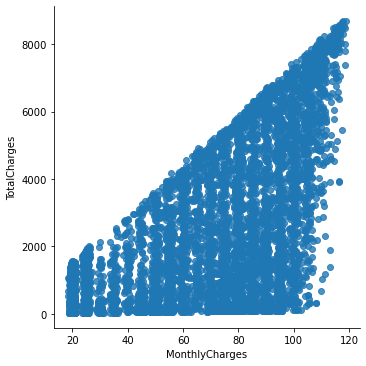

In [36]:
sns.lmplot(data=df2, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Monthly charges by churn')

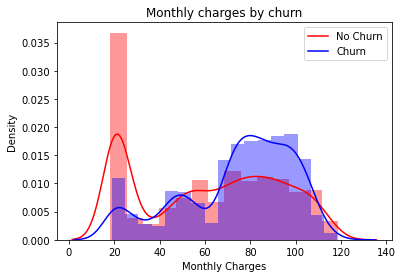

In [37]:
Mth = sns.distplot(df2.MonthlyCharges[(df2["Churn"] == 0) ],color="Red")
Mth = sns.distplot(df2.MonthlyCharges[(df2["Churn"] == 1) ],ax =Mth, color="Blue")
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Akash\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Charges by churn')

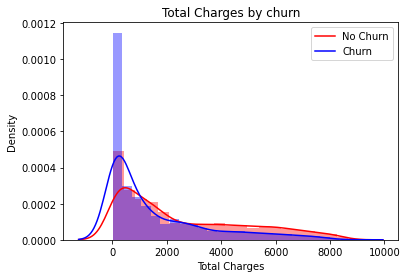

In [38]:
Mth = sns.distplot(df2.TotalCharges[(df2["Churn"] == 0) ],color="Red")
Mth = sns.distplot(df2.TotalCharges[(df2["Churn"] == 1) ],ax =Mth, color="Blue")
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by churn')

#### surprisingly low total charges have bigger number of churn rate might be reason behind churn is diffrent 

<AxesSubplot:>

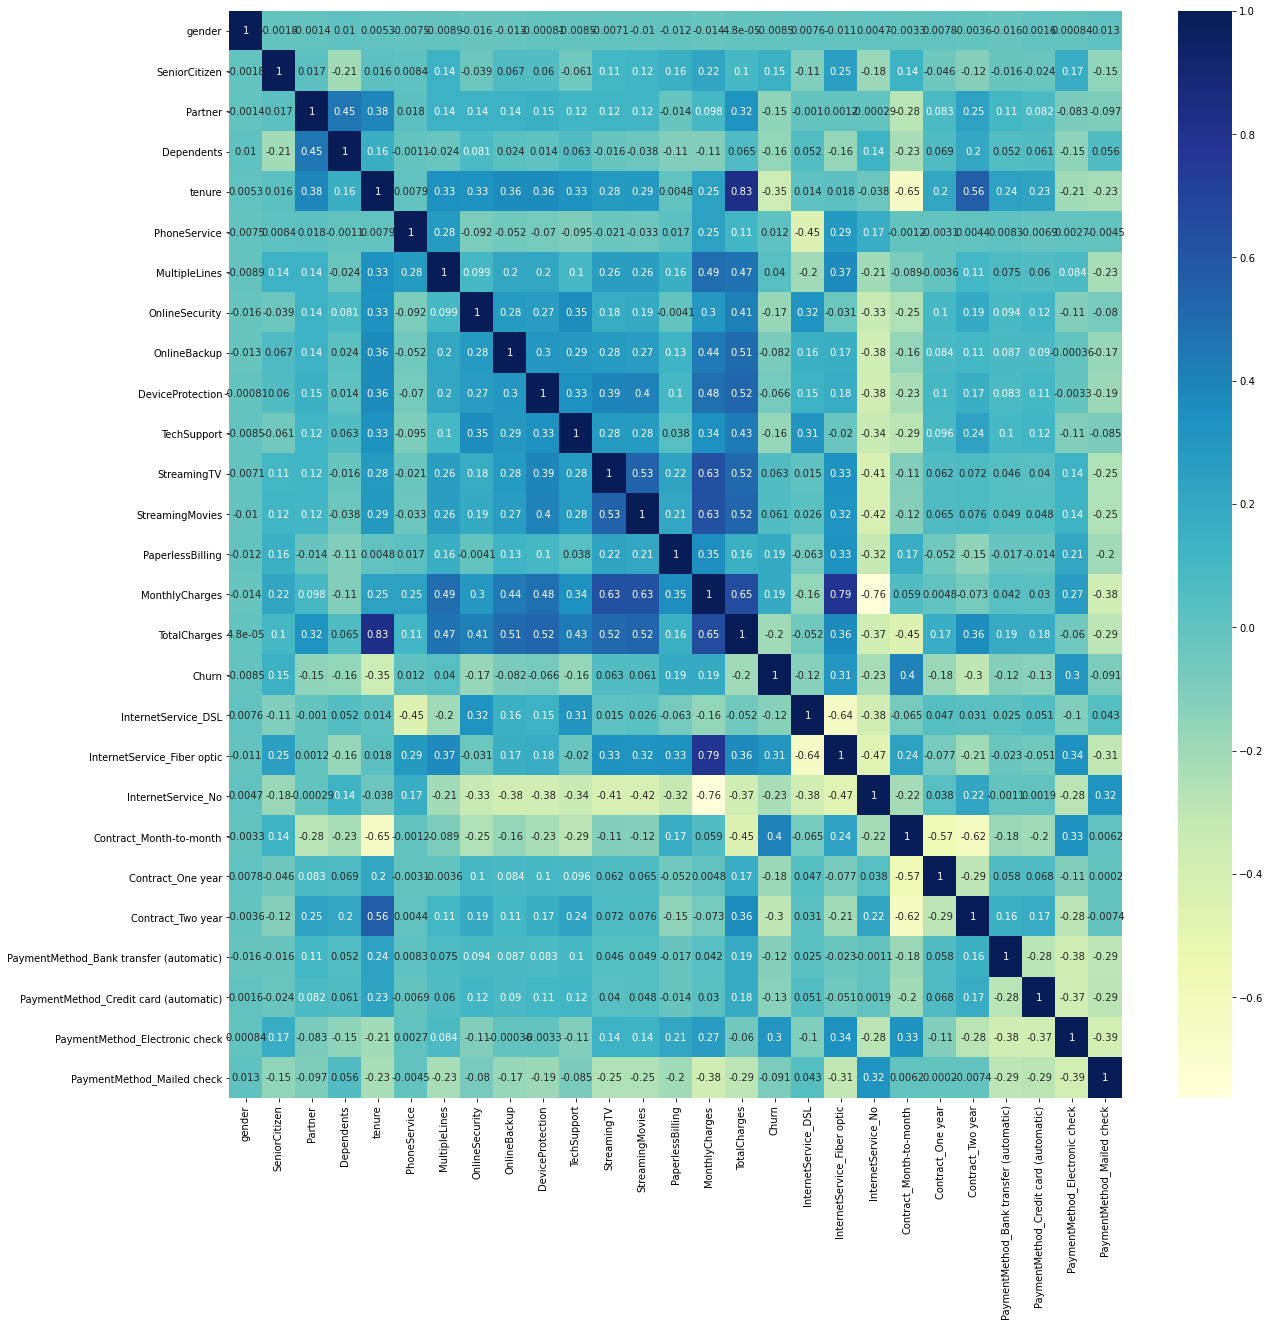

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), cmap="YlGnBu",annot=True)

### Implement Machine Learning Models

In [38]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [39]:
X = df2.drop(columns = ['Churn'])
y = df2['Churn'].values

In [40]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [41]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [43]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

# Find Accuracy using accuracy_score method
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)
print(logmodel_accuracy)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))
# Find Accuracy using classification_report method
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

80.94
[[1182  129]
 [ 206  241]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.54      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [44]:
from sklearn.svm import SVC

#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='rbf', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
print(svc_accuracy)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svc_pred))
# Find Accuracy using classification_report method
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_pred))

81.06
[[1202  109]
 [ 224  223]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1311
           1       0.67      0.50      0.57       447

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [46]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "entropy", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
print(dt_accuracy)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, dt_pred))
# Find Accuracy using classification_report method
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

74.69
[[1084  227]
 [ 218  229]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1311
           1       0.50      0.51      0.51       447

    accuracy                           0.75      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.75      0.75      0.75      1758



In [47]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,max_depth=14, min_samples_leaf=10)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
print(rf_accuracy)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_pred))
# Find Accuracy using classification_report method

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

80.77
[[1195  116]
 [ 222  225]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1311
           1       0.66      0.50      0.57       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



### Model Evaluation

In [48]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [49]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [50]:

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

# print classification report
print(classification_report(y_test, grid_predictions))

[[1184  127]
 [ 215  232]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1311
           1       0.65      0.52      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



In [51]:

# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# print best parameter after tuning
print(logreg_cv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(logreg_cv.best_estimator_)

grd_predictions = logreg_cv.predict(X_test)
print(confusion_matrix(y_test, grd_predictions))

# print classification report
print(classification_report(y_test, grid_predictions))
    


C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 2275.845926074791}
LogisticRegression(C=2275.845926074791)
[[1181  130]
 [ 203  244]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1311
           1       0.65      0.52      0.58       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



In [52]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200 ]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
  
# print best parameter after tuning
print(grid_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

gd_predictions = grid_search.predict(X_test)
print(confusion_matrix(y_test, gd_predictions))

# print classification report
print(classification_report(y_test, gd_predictions))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   55.5s finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=5,
                       min_samples_split=12)
[[1203  108]
 [ 243  204]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1311
           1       0.65      0.46      0.54       447

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.79      0.80      0.79      1758



AS we found that data set is imbalanced and we get low accuracy, Hence, I check recall, precision & f1 score also confucion matrix to get better model, i found that SVM and Logistic regression performing better than other model 

In [53]:
pip install imblearn

In [56]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [67]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(xr_train, yr_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
gri_predictions = grid.predict(xr_test)
print(confusion_matrix(yr_test, gri_predictions))

# print classification report
print(classification_report(yr_test, gri_predictions))

svc_accuracy = round(metrics.accuracy_score(yr_test, gri_predictions) * 100, 2)
print(svc_accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.2min finished


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)
[[516  13]
 [ 10 708]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       529
           1       0.98      0.99      0.98       718

    accuracy                           0.98      1247
   macro avg       0.98      0.98      0.98      1247
weighted avg       0.98      0.98      0.98      1247

98.16


In [68]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(xr_train, yr_train)
  
# print best parameter after tuning
print(logreg_cv.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(logreg_cv.best_estimator_)

grd_predictions = logreg_cv.predict(xr_test)
print(confusion_matrix(yr_test, grd_predictions))

# print classification report
print(classification_report(yr_test, grd_predictions))


lg_accuracy = round(metrics.accuracy_score(yr_test, grd_predictions) * 100, 2)
print(lg_accuracy)

{'C': 31.622776601683793}
LogisticRegression(C=31.622776601683793)
[[470  59]
 [ 59 659]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       529
           1       0.92      0.92      0.92       718

    accuracy                           0.91      1247
   macro avg       0.90      0.90      0.90      1247
weighted avg       0.91      0.91      0.91      1247

90.54


In [69]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200 ]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(xr_train, yr_train)
  
# print best parameter after tuning
print(grid_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

gd_predictions = grid_search.predict(xr_test)
print(confusion_matrix(yr_test, gd_predictions))

# print classification report
print(classification_report(yr_test, gd_predictions))
rm_accuracy = round(metrics.accuracy_score(yr_test, gd_predictions) * 100, 2)
print(rm_accuracy)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.4min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)
[[493  36]
 [ 26 692]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       529
           1       0.95      0.96      0.96       718

    accuracy                           0.95      1247
   macro avg       0.95      0.95      0.95      1247
weighted avg       0.95      0.95      0.95      1247

95.03


### Final Conclusions

#### Step 1 : Import all Required library and Data



#### Step 2: Understanding the data

lot of categorical data present in the dataset ------  convert that categorical data to numerical data by repalceing yes/no                                                            and also if unique value is equal to '2'with 0 and 1. also if unique                                                            value is more than 2 the i use one hot encoding.

missing value in totalcharges col                 ----- replace nan with 0 and convert its data type obj to float

#### Step 3: Data Visualization and EDA

1.data is not normally distributed
2.some factors like Gender, Availability of PhoneService and multiple lines have alomost NO impact on Churn
3.totalcharges and turnre have outlier present in it.
4.companies customer mostly subscribe Monthly plan
##### relation between churn and other col 
### counter measure to decrese churn rate and improve customer base
1.churn rate in both gender is same.---
2.churn rate in young customur is high.
3.churn rate of connection with partner in less than with partner. ----- # for less churn company might need to focuse on plan that can be own partner.
5.fiber optic have high churn rate as compare to other ---- # comapany need to improve its optical fiber network 
6.bad internet service increase churn rate. ----- company need to provide good internet service for less churn rate
7.having no backup is another reason high churn rate --- # backup required
8.with device protection churn rate is low ---- need to provide device protection
9.with no service support is major reason behind churn ----- # service support is must
10.Avilablity of streaming tv platform is set to low churn rate.---- # giving facilities of online strem of tv is need 
11.Avilablity of streaming movie platform is set to low churn rate ----- # giving facilities of online strem of movies is need
12.Monthly subscriber have high churn rate. ----- # giving offers to the monthly subscriber for upgrade to yearly plan will improve. 
13.most of the customur choose paperless bill but it also have high churn rate. ----- # giving facility of paperless billing and accepting amount by card and bank transfer will imporve customer base
14.electronic check paymet method have most number of churn.

### other graph
##### as expected monthly charges increase in total charges 

##### then having more charges of monthly subscription increase churn 

##### surprisingly low total charges have bigger number of churn rate might be reason behind churn is diffrent 

### Model Building and Evaluating

##### In first attmpt of model building i get accuracy of 74% to 80% 
##### I try to perform hypermarameter tunning more of less same reasone as dataset is imbalance  as we know and now its proved
##### By Over-sampling and Under-sampling i get improved dataset and performing hyperparameter tunning i get better result from SVC algorithme 98%